<a href="https://colab.research.google.com/github/khang0407/mas/blob/main/Copy_of_AI_Khang.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Dataset. Dataset link:

In [53]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import itertools as iter

In [54]:

import pandas
url= 'https://raw.githubusercontent.com/khang0407/mas/main/data.csv'
dataset = pandas.read_csv(url)
dataset.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


Define *x* and *y* attributes.

In [55]:
x = dataset.drop(columns=['diagnosis'])

In [56]:
y = dataset['diagnosis']

Split the data into a training set and a testing set (20-80 proportion).

In [57]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

Build and train the model.

In [58]:
import keras
model = keras.models.Sequential()

In [59]:
model.add(keras.layers.Dense(64,input_shape=(x_train.shape[1],), activation='sigmoid'))
model.add(keras.layers.Dense(128, activation='sigmoid'))
model.add(keras.layers.Dense(256, activation='sigmoid'))
model.add(keras.layers.Dense(128, activation='sigmoid'))
model.add(keras.layers.Dense(64, activation='sigmoid'))
model.add(keras.layers.Dense(1, activation='sigmoid'))


In [60]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_26 (Dense)            (None, 64)                384       
                                                                 
 dense_27 (Dense)            (None, 128)               8320      
                                                                 
 dense_28 (Dense)            (None, 256)               33024     
                                                                 
 dense_29 (Dense)            (None, 128)               32896     
                                                                 
 dense_30 (Dense)            (None, 64)                8256      
                                                                 
 dense_31 (Dense)            (None, 1)                 65        
                                                                 
Total params: 82,945
Trainable params: 82,945
Non-trai

In [61]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=100)
model_train = model.fit(x=x_train, y=y_train, validation_data=(x_test, y_test), epochs=1000, callbacks=[early_stopping])


Epoch 1/1000
15/15 [==============================] - 1s 15ms/step - loss: 0.2477 - accuracy: 0.5714 - val_loss: 0.2483 - val_accuracy: 0.5877
Epoch 2/1000
15/15 [==============================] - 0s 5ms/step - loss: 0.2305 - accuracy: 0.6374 - val_loss: 0.2425 - val_accuracy: 0.5877
Epoch 3/1000
15/15 [==============================] - 0s 4ms/step - loss: 0.2341 - accuracy: 0.6374 - val_loss: 0.2472 - val_accuracy: 0.5877
Epoch 4/1000
15/15 [==============================] - 0s 6ms/step - loss: 0.2313 - accuracy: 0.6374 - val_loss: 0.2424 - val_accuracy: 0.5877
Epoch 5/1000
15/15 [==============================] - 0s 6ms/step - loss: 0.2307 - accuracy: 0.6374 - val_loss: 0.2436 - val_accuracy: 0.5877
Epoch 6/1000
15/15 [==============================] - 0s 4ms/step - loss: 0.2295 - accuracy: 0.6374 - val_loss: 0.2417 - val_accuracy: 0.5877
Epoch 7/1000
15/15 [==============================] - 0s 6ms/step - loss: 0.2259 - accuracy: 0.6374 - val_loss: 0.2344 - val_accuracy: 0.5877
Epoch

In [62]:
model.evaluate(x_test, y_test)

4/4 [==============================] - 0s 3ms/step - loss: 0.1064 - accuracy: 0.8246


[0.10641706734895706, 0.8245614171028137]

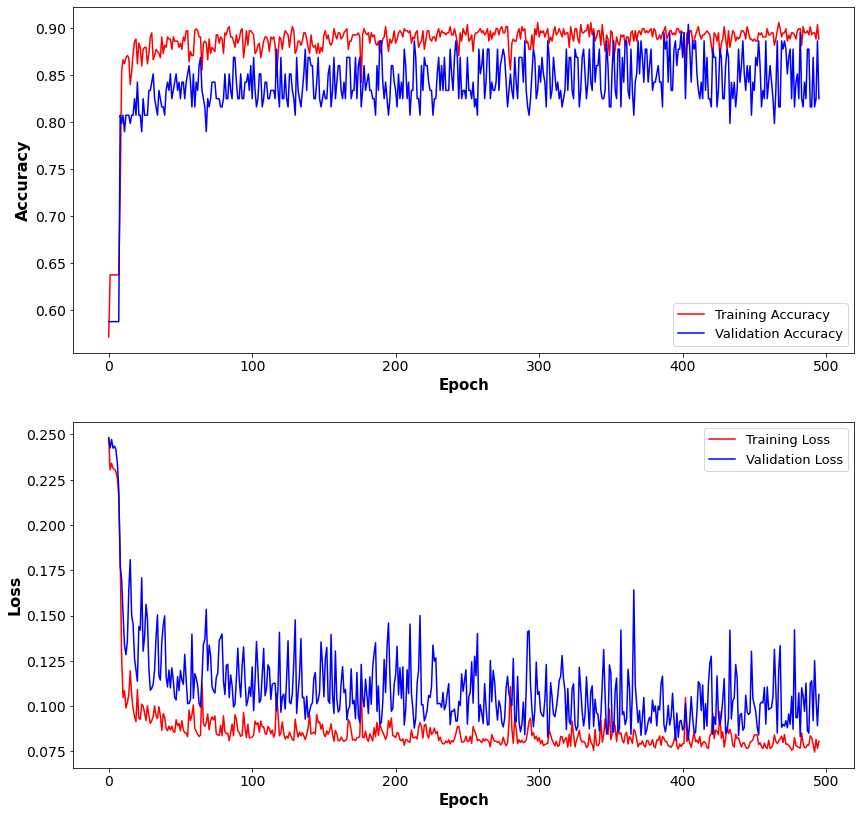

In [63]:
accuracy = model_train.history['accuracy']
val_accuracy = model_train.history['val_accuracy']

loss = model_train.history['loss']
val_loss = model_train.history['val_loss']

plt.figure(figsize=(14, 14))

plt.subplot(2, 1, 1)
plt.plot(accuracy, label='Training Accuracy', color='r')
plt.plot(val_accuracy, label='Validation Accuracy', color='b')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='lower right', fontsize=13)
plt.ylabel('Accuracy', fontsize=16, weight='bold')
plt.xlabel('Epoch', fontsize=15, weight='bold')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss', color='r')
plt.plot(val_loss, label='Validation Loss', color='b')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='upper right', fontsize=13)
plt.ylabel('Loss', fontsize=16, weight='bold')
plt.xlabel('Epoch', fontsize=15, weight='bold')
plt.show()